In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

As described by [`Pradal et al. (2009)`](https://www.sciencedirect.com/science/article/pii/S1524070308000143): 

> Asymmetric hull: This envelope model, originally proposed by [`Horn (1971)`](https://press.princeton.edu/titles/1182.html) and [`Koop (1989)`](https://www.springer.com/us/book/9783642750144), then extended by [`Cescatti (1997)`](https://www.sciencedirect.com/science/article/pii/S0304380097000501), makes it possible to easily define asymmetric crown shapes. The envelope is defined using six control points in six directions and two shape factors $C_T$ and $C_B$ that control its convexity. With a few easily controllable parameters, a large variety of realistic crown shapes can be achieved.

> The first two control point, $P_T$ and $P_B$, represent top and base points of the crown, respectively. The four other points $P_1$ to $P_4$ represent the different radius of the crown in two orthogonal directions. $P_1$ and $P_3$ are constrained to lie in the $xz$ plane and $P_2$ and $P_4$ in the $yz$ plane. These points define a peripheral line $L$ at the greatest width of the crown. For the $x$ and $y$ dimensions, $L$ is composed of four elliptical quarters. The height of points of $L$ is defined as an interpolation of the heights of the control points.

> The two shape factors $C_T$ and $C_B$ describe the curvature of the crown above and below the peripheral line. Points of L are connected to the top and base points with quarters of super-ellipse of degrees $C_T$ and $C_B$, respectively. Different shape factor values generate conical ($C_i = 1$), ellipsoidal ($C_i = 2$), concave ($C_i \in [0,1]$), or convex ($C_i \in [1,1]$) shapes. A great variety of shapes can be achieved by modifying shape factor values (see Fig. 5).

> ![Figure 4. Asymmetric hull parameters](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGqYEgcXM6qIQPvvwIFy2JbA-R0mJUaqTjGiuwvUx-KOZXmqaI) 

> ![Fig. 5. Examples of asymmetric hulls showing plasticity of this model to represent tree crowns (inspired by Cescatti (1997) )](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNxystVM6MU6jra_VinAvgtKu0Dazg7ddMvOVv5a5kYFsFDVIwZg)

> This envelope model is defined by six control points and two shape factors $C_T$ and $C_B$. The four points $P_1$ to $P_4$ define the peripheral line $L$. For $x$ and $y$, points of $L$ form four elliptical quarters centered on the origin. For $z$, their height is defined as an interpolation of the heights of the control points. To be continuous at the control points, we used factors $\cos^2\theta$ and $\sin^2\theta$ in the interpolation. Thus, a point $P_{\theta,i,j}$ of a quarter of $L$ between control points $P_i$ and $P_j$ with $i,j \in [(1, 2),(2, 3),(3, 4),(4, 1)]$, located at an angle $\theta \in [0, \frac{\pi}{2})$, is defined as
>> $P_{\theta,i,j} = \left[ r_{P_i}\cos\theta, r_{P_j}\sin\theta, z_{P_i}\cos^2\theta + z_{P_j}\sin^2\theta\right]$

> Points of $L$ are connected to the top and base points with quarters of super-ellipses of degrees $C_T$ and $C_B$, respectively. Letting $P_l\in L$ and $P_T$ be the top point of the envelope, the super-ellipse quarter connecting $P_l$ and $P_T$ is defined as
>>$\left\{ P=(\theta,r,z) \big| \frac{(r-r_{P_T})^{C_T}}{(r_{P_l}-r_{P_T})^{C_T}}+\frac{(z-z_{P_T})^{C_T}}{(z_{P_l}-z_{P_T})^{C_T}} = 1 \right\}$

> An equivalent equation is obtained for super-ellipse quarters using $P_B$ and $C_B$ instead of $P_T$ and $C_T$.

Measurements in the field:  
$H_c$ = `crown_base_ht`  
$H_t$ = `crown_apex_ht`  
$C_l^i$ = `crown_length_i` for i = 0,1,2,3 in west, north, east, south directions, distance from stem base  
$H_p^i$ = `crown_edge_ht_i` for i = 0,1,2,3 in west, north, east, south directions  
$E_p^i$ = `crown_shape_p_i` for p = 0,1 for top,bottom and i = 0,1,2,3 in west, north, east, south directions

In [2]:
crown_base_ht = 15
crown_apex_ht = 75
crown_ratio = (1-crown_base_ht/crown_apex_ht)
crown_edge_hts = np.array([35.0,30.0,45.0,40.0], dtype=float) # E, N, W, S points
crown_lengths = np.array([20.0,15.0,5.0,8.0], dtype=float) # E, N, W, S points
crown_shapes = np.array([[1.5, 1.8, 1.2, 2.9], # top of crown for E, N, W, S points
                         [1.0, 2.0, 2.5, 2.0]], dtype=float) # bottom of crown for ... points

Calculations of morphological points from measurements
(x,y,z) coordinates of six points: 
-  crown base
-  crown apex
-  4x peripheral points at extremeties of crown radii

In [3]:
stem_base = np.array([0,0,0], dtype=float)
stem_base

array([0., 0., 0.])

In [4]:
periph_pts = np.array([[stem_base[0]+crown_lengths[0],stem_base[1],crown_edge_hts[0]],
                      [stem_base[0],stem_base[1]+crown_lengths[1],crown_edge_hts[1]],
                      [stem_base[0]-crown_lengths[2],stem_base[1],crown_edge_hts[2]],
                      [stem_base[0],stem_base[1]-crown_lengths[3],crown_edge_hts[3]]], dtype=float)
periph_pts

array([[20.,  0., 35.],
       [ 0., 15., 30.],
       [-5.,  0., 45.],
       [ 0., -8., 40.]])

In [5]:
crown_center_xy = np.array([stem_base[0] - np.diff(crown_lengths[0::2]/2), 
                            stem_base[0] - np.diff(crown_lengths[1::2])/2])
crown_center_xy

array([[7.5],
       [3.5]])

In [6]:
crown_eccentricity = np.array([(crown_center_xy[0]-stem_base[0])/crown_lengths[0::2].mean(), # x direction
                                 (crown_center_xy[1]-stem_base[1])/crown_lengths[1::2].mean()]) # y direction
crown_eccentricity

array([[0.6       ],
       [0.30434783]])

In [7]:
eccen_idx = np.array([-2/np.pi * np.arctan(crown_eccentricity)*crown_ratio, # top of tree, x and y
                     2/np.pi * np.arctan(crown_eccentricity)*crown_ratio]) # bottom of tree, x and y
eccen_idx

array([[[-0.27523339],
        [-0.15046678]],

       [[ 0.27523339],
        [ 0.15046678]]])

In [8]:
crown_apex = np.array([crown_center_xy[0] + np.diff(crown_lengths[0::2])*eccen_idx[0][0], # x location of crown apex
                       crown_center_xy[1] + np.diff(crown_lengths[1::2])*eccen_idx[0][1], # y location of crown apex
                       crown_apex_ht], dtype=float)

crown_base = np.array([crown_center_xy[0] + np.diff(crown_lengths[0::2])*eccen_idx[1][0], # x location of crown base
                       crown_center_xy[1] + np.diff(crown_lengths[1::2])*eccen_idx[1][1], # y location of crown base
                       crown_base_ht], dtype=float)

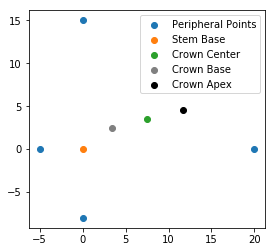

In [9]:
plt.scatter(periph_pts[:,0],periph_pts[:,1], label='Peripheral Points')
plt.scatter(stem_base[0], stem_base[1], label='Stem Base')
plt.scatter(crown_center_xy[0], crown_center_xy[1], label='Crown Center')
plt.scatter(crown_base[0], crown_base[1], label='Crown Base', c='gray')
plt.scatter(crown_apex[0], crown_apex[1], label='Crown Apex', c='black')
plt.gca().set_aspect('equal')
plt.legend()
plt.show();

In [11]:
def asymmetric_hull(xs, ys, zs, stem_base, peripheral_points, crown_base, 
                    crown_apex, shape_coefs, level_set=False):
    '''
    Parameters
    ----------
    xs: array
        x coordinates of point(s)
    ys: numeric
        y coordinates of point(s)
    zs: array
        z coordinates of point(s)
    stem_base: array with shape(3,)
        (x,y,z) coordinates of stem base
    peripheral_points: array with shape (4,3)
        (x,y,z) coordinates for four peripheral points
    crown_base: array with shape(3,)
        (x,y,z) coordinates of crown base
    crown_apex: array with shape(3,)
        (x,y,z) coordinates of crown apex
    shape_coefs: array with shape (4,2)
        shape coefficients describing curvature of crown profiles
        in each direction (E, N, W, S) and for top and bottom of crown
    level_set: boolean (optional)
        If True, returns the signed distance between the grid point and 
        crown, with positive values representing interior points. 
        False returns a binarized version.
    '''
    # 2D grid for calculating radial and angular attributes
    xx, yy = np.meshgrid(xs, ys) 
    # 3D grid when we're ready to make calculations in height slices
    grid_x, grid_y, grid_z = np.meshgrid(xs, ys, zs) 
    
    # calculate height difference between apex/base and peripheral points
    top_periph_h = crown_apex[2]-peripheral_points[:,2]
    bot_periph_h = peripheral_points[:,2]-crown_base[2]
    
    # calculate radial (horizontal) distance of peripheral points from crown apex
    top_periph_r = np.hypot(peripheral_points[:,0]-crown_apex[0],
                            peripheral_points[:,1]-crown_apex[1])
    
    # calculate angles between peripheral points with crown apex and crown base
    periph_v_apex_theta = np.arctan2(peripheral_points[:,1]-crown_apex[1], 
                                     peripheral_points[:,0]-crown_apex[0])
    periph_v_base_theta = np.arctan2(peripheral_points[:,1]-crown_base[1], 
                                     peripheral_points[:,0]-crown_base[1])
    
    # calculate angles between grid points and crown apex along xy plane 
    top_grid_theta = np.arctan2(yy-crown_apex[1],
                                xx-crown_apex[0])
    
    # calculate radial (horizontal) distances from apex along peripheral line
    # at angles theta (for all points on the xy grid)
    # linear interpolate between observed peripheral points
    apex_pline_r = np.interp(top_grid_theta,
                             periph_v_apex_theta, 
                             top_periph_r, 
                             period=2*np.pi)

    # convert peripheral line from polar to cartesian coordinates
    pline_xs = apex_pline_r*np.cos(top_grid_theta)+crown_apex[0]
    pline_ys = apex_pline_r*np.sin(top_grid_theta)+crown_apex[1]
    
    # calculate height of peripheral line using linear interpolation of heights below apex
    pline_zs = crown_apex[2] - np.interp(top_grid_theta, 
                                         periph_v_apex_theta, 
                                         top_periph_h, 
                                         period=2*np.pi)
    
    # calculate the angles between points on the peripheral line and crown base
    base_pline_theta = np.arctan(pline_ys-crown_base[1],
                                 pline_xs-crown_base[0])
    
    # calculate radial distance between points on the peripheral line and crown base
    base_pline_r = np.hypot(pline_xs-crown_base[0],
                            pline_ys-crown_base[1])
    
    # calculate the shape coefficients by angle theta (relative to apex) using linear interpolation
    top_shape = np.interp(top_grid_theta, 
                          periph_v_apex_theta, 
                          shape_coefs[0], 
                          period=2*np.pi)
    bot_shape = np.interp(base_pline_theta, 
                          periph_v_base_theta, 
                          shape_coefs[1], 
                          period=2*np.pi)
    
    # stack layers of pline_zs, top_shape, bot_shape, apex_pline_r, base_pline_r
    # until they have same shape as grid_z (by vertical stacking)
    grid_pline_zs = np.repeat(pline_zs[:, :, np.newaxis], grid_z.shape[2], axis=2)
    grid_top_shape = np.repeat(top_shape[:, :, np.newaxis], grid_z.shape[2], axis=2)
    grid_bot_shape = np.repeat(bot_shape[:, :, np.newaxis], grid_z.shape[2], axis=2)
    grid_apex_pline_r = np.repeat(apex_pline_r[:, :, np.newaxis], grid_z.shape[2], axis=2)
    grid_base_pline_r = np.repeat(base_pline_r[:, :, np.newaxis], grid_z.shape[2], axis=2)
       
    # boolean mask to split points for calculations for top and bottom of crown
    grid_top = grid_z >= grid_pline_zs # grid points above point of max crown width
    grid_bot = grid_z < grid_pline_zs # grid points below point of max crown width
    
    # calculate crown radius at height z
    edge_r = np.empty_like(grid_z)
    edge_r[grid_top] = (((1-(grid_z[grid_top]-grid_pline_zs[grid_top])**grid_top_shape[grid_top] \
                          /(crown_apex[2]-grid_pline_zs[grid_top])**grid_top_shape[grid_top]) \
                         *grid_apex_pline_r[grid_top]**grid_top_shape[grid_top])**(1/grid_top_shape[grid_top]))
    edge_r[grid_bot] = (((1-(grid_pline_zs[grid_bot]-grid_z[grid_bot])**grid_bot_shape[grid_bot] \
                          /(grid_pline_zs[grid_bot]-crown_base[2])**grid_bot_shape[grid_bot]) \
                         *grid_base_pline_r[grid_bot]**grid_bot_shape[grid_bot])**(1/grid_bot_shape[grid_bot]))
    # slower versions where you calculate at all grid points
    #     edge_r[grid_top] = (((1-(grid_z-grid_pline_zs)**grid_top_shape/(crown_apex[2]-grid_pline_zs)**grid_top_shape)*grid_apex_pline_r**grid_top_shape)**(1/grid_top_shape))[grid_top]
    #     edge_r[grid_bot] = (((1-(grid_pline_zs-grid_z)**grid_bot_shape/(grid_pline_zs-crown_base[2])**grid_bot_shape)*grid_base_pline_r**grid_bot_shape)**(1/grid_bot_shape))[grid_bot]
    
    # calculate radial (horizontal) distance of each grid point from crown apex/base
    grid_r = np.empty_like(grid_z)
    grid_r[grid_top] = (np.hypot(grid_x[grid_top]-crown_apex[0],
                                 grid_y[grid_top]-crown_apex[1]))
    grid_r[grid_bot]= np.hypot(grid_x[grid_bot]-crown_base[0],
                               grid_y[grid_bot]-crown_base[1])
    
    if not level_set:
        return grid_r <= edge_r
    else:
        return edge_r - grid_r

In [24]:
# x,y,z = np.vstack([periph_pts, periph_pts[0]]).T
# periph = go.Mesh3d(x=x,y=y,z=z,name='periph points') 

x,y,z = periph_pts.T
periph = go.Scatter3d(x=x,y=y,z=z,name='periph points', mode='markers') 

x,y,z = np.vstack([stem_base, crown_base]).T
stem = go.Scatter3d(x=x,y=y,z=z, name='stem', mode='lines+markers',
                   line=dict(color='#D2691E', width=15))

x,y,z = crown_apex.T
apex = go.Scatter3d(x=[x],y=[y],z=[z],name='apex', mode='markers')

# generate hull
xs = np.arange(periph_pts[:,0].min()-20, periph_pts[:,0].max()+20, 2)
ys = np.arange(periph_pts[:,1].min()-20, periph_pts[:,1].max()+20, 2)
zs = np.arange(stem_base[2], crown_apex[2], 1)
xx, yy, zz = np.meshgrid(xs, ys, zs)

arr = asymmetric_hull(xs, ys, zs,
                      stem_base, 
                      periph_pts, 
                      crown_base,
                      crown_apex, 
                      crown_shapes) # crown shapes

crown_fill = go.Scatter3d(x=xx[arr],y=yy[arr],z=zz[arr], mode='markers',name='crown fill',
                          marker=dict(size=2, color='rgba(0,256,0,0.99)'))

# make the plot
layout = go.Layout()
fig = go.Figure(data=[periph, stem, apex, crown_fill],layout=layout)
iplot(fig)

C:\Users\ddiaz\AppData\Local\Continuum\anaconda3\envs\viz3d\lib\site-packages\ipykernel\__main__.py:104: RuntimeWarning:

invalid value encountered in power

C:\Users\ddiaz\AppData\Local\Continuum\anaconda3\envs\viz3d\lib\site-packages\ipykernel\__main__.py:122: RuntimeWarning:

invalid value encountered in less_equal



In [25]:
def hull_edge(stem_base, peripheral_points, crown_base,
              crown_apex, shape_coefs, level_set=False,
              verbose=False, top_only=False, bot_only=False):
    '''
    Parameters
    ----------
    stem_base: array with shape(3,)
        (x,y,z) coordinates of stem base
    peripheral_points: array with shape (4,3)
        (x,y,z) coordinates for four peripheral points
    crown_base: array with shape(3,)
        (x,y,z) coordinates of crown base
    crown_apex: array with shape(3,)
        (x,y,z) coordinates of crown apex
    shape_coefs: array with shape (4,2)
        shape coefficients describing curvature of crown profiles
        in each direction (E, N, W, S) and for top and bot of crown
    level_set: boolean (optional)
        If True, returns the signed distance between the grid point and 
        crown, with positive values representing interior points. 
        False returns a binarized version.
    '''
    # places where we'll calculate crown surface
    theta = np.linspace(0,2*np.pi,32,endpoint=False) # angles
    zs = np.linspace(stem_base[2],crown_apex[2],50) # heights
    thetas, zz = np.meshgrid(theta, zs)
        
    # calculate height difference between apex/base and peripheral points
    top_periph_h = crown_apex[2] - peripheral_points[:,2]
    bot_periph_h = peripheral_points[:,2] - crown_base[2]
    
    # calculate radial (horizontal) distance from apex axis to peripheral points
    top_periph_r = np.hypot(peripheral_points[:,1]-crown_apex[1], peripheral_points[:,0]-crown_apex[0])
    
    # calculate the angle between peripheral points and apex/base axis
    periph_v_apex_theta = np.arctan2(periph_pts[:,1]-crown_apex[1],periph_pts[:,0]-crown_apex[0])
    periph_v_base_theta = np.arctan2(periph_pts[:,1]-crown_base[1],periph_pts[:,0]-crown_base[0])
        
    # calculate radiii along peripheral line (maximum crown widths by angle theta using linear interpolation)
    top_pline_r = np.interp(thetas, periph_v_apex_theta, top_periph_r, period=2*np.pi)
    
    # convert peripheral line to x,y,z coords
    top_pline_xs = top_pline_r * np.cos(thetas) + crown_apex[0]
    top_pline_ys = top_pline_r * np.sin(thetas) + crown_apex[1]
    top_pline_zs = crown_apex[2] - np.interp(thetas, periph_v_apex_theta, top_periph_h, period=2*np.pi)
    
    # calculate the angles between points on the peripheral line and crown base
    bot_pline_theta = np.arctan2(top_pline_ys-crown_base[1], top_pline_xs-crown_base[0])
    # calculate radial distance between points on the peripheral line and crown base
    bot_pline_r = np.hypot(top_pline_xs-crown_base[0], top_pline_ys-crown_base[1])

#     # these are only used to plot pline estimated from bottom of crown for debugging purposes
#     bot_pline_xs = bot_pline_r * np.cos(bot_pline_theta) + crown_base[0]
#     bot_pline_ys = bot_pline_r * np.sin(bot_pline_theta) + crown_base[1]
#     bot_pline_zs = np.interp(bot_pline_theta, periph_v_base_theta, bot_periph_h, period=2*np.pi) + crown_base[2]

    # calculate the shape coefficients by angle theta (relative to apex) using linear interpolation
    top_shape = np.interp(thetas, periph_v_apex_theta, shape_coefs[0], period=2*np.pi)
    bot_shape = np.interp(bot_pline_theta, periph_v_base_theta, shape_coefs[1], period=2*np.pi)
    
    # calculate crown radius at height z
    top_edge_r = ((1-(zz-top_pline_zs)**top_shape/(crown_apex[2]-top_pline_zs)**top_shape)*top_pline_r**top_shape)**(1/top_shape)
    bot_edge_r = ((1-(top_pline_zs-zz)**bot_shape/(top_pline_zs-crown_base[2])**bot_shape)*bot_pline_r**bot_shape)**(1/bot_shape)

    # calculate cartesian coordinates of crown edge points
    top_edge_x = (top_edge_r * np.cos(thetas) + crown_apex[0]).flatten()
    top_edge_y = (top_edge_r * np.sin(thetas) + crown_apex[1]).flatten()
    bot_edge_x = (bot_edge_r * np.cos(bot_pline_theta) + crown_base[0]).flatten()
    bot_edge_y = (bot_edge_r * np.sin(bot_pline_theta) + crown_base[1]).flatten()
    edge_x = np.hstack([top_edge_x, bot_edge_x])
    edge_y = np.hstack([top_edge_y, bot_edge_y])
    edge_z = np.hstack([zz.flatten(), zz.flatten()])
    
    return edge_x, edge_y, edge_z, top_pline_xs.flatten(), top_pline_ys.flatten(), top_pline_zs.flatten(), # bot_pline_xs.flatten(), bot_pline_ys.flatten(), bot_pline_zs.flatten()

In [29]:
x,y,z = periph_pts.T
periph = go.Scatter3d(x=x,y=y,z=z,name='periph points', mode='markers') 

x,y,z = np.vstack([stem_base, crown_base]).T
stem = go.Scatter3d(x=x,y=y,z=z, name='stem', mode='lines+markers',
                   line=dict(color='#D2691E', width=15))

x,y,z = crown_apex.T
apex = go.Scatter3d(x=[x],y=[y],z=[z],name='apex', mode='markers')

x,y,z, top_x,top_y,top_z = hull_edge(stem_base, periph_pts, crown_base,
                  crown_apex, crown_shapes)

crown_edge = go.Scatter3d(x=x,y=y,z=z, name='edge', mode='markers',
                          marker=dict(size=2, color='rgba(0,256,0,0.99)'))
top_mcw = go.Scatter3d(x=top_x,y=top_y,z=top_z, name='top_mcw', mode='markers',
                       marker=dict(size=3))

layout = go.Layout()
fig = go.Figure(data=[periph, stem, apex, crown_edge, top_mcw],layout=layout)
iplot(fig)

C:\Users\ddiaz\AppData\Local\Continuum\anaconda3\envs\viz3d\lib\site-packages\ipykernel\__main__.py:62: RuntimeWarning:

invalid value encountered in power

C:\Users\ddiaz\AppData\Local\Continuum\anaconda3\envs\viz3d\lib\site-packages\ipykernel\__main__.py:63: RuntimeWarning:

invalid value encountered in power



In [ ]:
%%timeit
xs = np.arange(periph_pts[:,0].min()-30, periph_pts[:,0].max()+30, 1)
ys = np.arange(periph_pts[:,1].min()-30, periph_pts[:,1].max()+30, 1)
zs = np.arange(stem_base[2], crown_apex[2], 1)
# arr = asymmetric_hull(xs, ys, zs,
#                 stem_base, periph_pts, crown_base, 
#                 crown_apex, crown_shapes, level_set=False)

arr = asymmetric_hull(xs, ys, zs,
                stem_base, periph_pts, crown_base, 
                crown_apex, crown_shapes, level_set=False)